In [1]:
import ROOT
import numpy as np
import json
import math

ROOT.gStyle.SetOptStat(0)

In [2]:
# Set the output directory for the plots
outPdfDir = "/d/home/septian/EtaPi0Plot/"

In [3]:
# Setup for minuit fit results
ROOTFileDir = "/d/grid17/septian/Moments2Amplitudes/brufit/fitMoments_GlueXAcceptanceSignal_SDwaves_R6.34/"
MinuitFileName = "ResultsHSMinuit2.root"
MomentTrueValuejsonFile = "/d/grid17/septian/Moments2Amplitudes/plots/SD_waves/trueMomentValues.json"


In [4]:
def GetMomentsTrueValue(file_name, var_name):
    with open(file_name, 'r') as f:
        true_values = json.load(f)

    # print("True values from json file: ", true_values)
    split_var_name = var_name.split("_")
    # loop over true_values
    true_value = None
    if len(split_var_name) == 4:
        H, alpha, L, M = split_var_name
        for true_value_dict in true_values:
            true_alpha = true_value_dict["qn"]["momentIndex"]
            true_L = true_value_dict["qn"]["L"]
            true_M = true_value_dict["qn"]["M"]
            # print("true_alpha, true_L, true_M: ", true_alpha, true_L, true_M)
            if (int(alpha) == int(true_alpha)) and (int(L) == int(true_L)) and (int(M) == int(true_M)):
                # print("alpha, L, M: ", alpha, L, M)
                if int(alpha) == 2:
                    true_value = true_value_dict["val_Im"]
                else:
                    true_value = true_value_dict["val_Re"]
                break

    return true_value

In [5]:
fileMinuit = ROOT.TFile(ROOTFileDir + MinuitFileName)

In [6]:
fileMinuit.ls()
dfMinuit = ROOT.RDataFrame("ResultTree", ROOTFileDir + MinuitFileName)

TFile**		/d/grid17/septian/Moments2Amplitudes/brufit/fitMoments_GlueXAcceptanceSignal_SDwaves_R6.34/ResultsHSMinuit2.root	
 TFile*		/d/grid17/septian/Moments2Amplitudes/brufit/fitMoments_GlueXAcceptanceSignal_SDwaves_R6.34/ResultsHSMinuit2.root	
  KEY: RooDataSet	FinalParameters;1	HSMinuit2Results
  KEY: TProcessID	ProcessID0;1	bad53a08-34ed-11f0-bf94-3a01010abeef
  KEY: TTree	ResultTree;1	ResultTree
  KEY: RooFitResult	MinuitResult;1	Result of fit of p.d.f. TotalPDF to dataset DataEvents
  KEY: TCanvas	_cosTheta_eta_hel;1	_cosTheta_eta_hel
  KEY: TCanvas	_phi_eta_hel;1	_phi_eta_hel
  KEY: TCanvas	_Phi;1	_Phi


In [7]:
# Get the list of all variables in the file
for i in dfMinuit.GetColumnNames():
    print(i)

H_0_1_0
H_0_1_0_err
H_0_1_1
H_0_1_1_err
H_0_2_0
H_0_2_0_err
H_0_2_1
H_0_2_1_err
H_0_2_2
H_0_2_2_err
H_0_3_0
H_0_3_0_err
H_0_3_1
H_0_3_1_err
H_0_3_2
H_0_3_2_err
H_0_3_3
H_0_3_3_err
H_0_4_0
H_0_4_0_err
H_0_4_1
H_0_4_1_err
H_0_4_2
H_0_4_2_err
H_0_4_3
H_0_4_3_err
H_0_4_4
H_0_4_4_err
H_1_0_0
H_1_0_0_err
H_1_1_0
H_1_1_0_err
H_1_1_1
H_1_1_1_err
H_1_2_0
H_1_2_0_err
H_1_2_1
H_1_2_1_err
H_1_2_2
H_1_2_2_err
H_1_3_0
H_1_3_0_err
H_1_3_1
H_1_3_1_err
H_1_3_2
H_1_3_2_err
H_1_3_3
H_1_3_3_err
H_1_4_0
H_1_4_0_err
H_1_4_1
H_1_4_1_err
H_1_4_2
H_1_4_2_err
H_1_4_3
H_1_4_3_err
H_1_4_4
H_1_4_4_err
H_2_1_1
H_2_1_1_err
H_2_2_1
H_2_2_1_err
H_2_2_2
H_2_2_2_err
H_2_3_1
H_2_3_1_err
H_2_3_2
H_2_3_2_err
H_2_3_3
H_2_3_3_err
H_2_4_1
H_2_4_1_err
H_2_4_2
H_2_4_2_err
H_2_4_3
H_2_4_3_err
H_2_4_4
H_2_4_4_err
NLL
Yld_Moment_GlueXAcceptanceSignal_SDwaves_R6.34
Yld_Moment_GlueXAcceptanceSignal_SDwaves_R6.34_err
status


In [8]:
dfMinuitNP = dfMinuit.AsNumpy()

# Test to get the value of a variable
H_0_1_0 = dfMinuitNP["H_0_1_0"]
print(H_0_1_0)

[-0.00142076]


In [9]:
def GetMinuitMomentValue(dfMinuitNP, var_name, MomentTrueValuejsonFile):
    # get the value of the variable from the first column of the dataframe
    value = dfMinuitNP[var_name]
    # get the error of the variable from the dataframe
    error = dfMinuitNP[var_name + "_err"]
    # get the true value of the variable from the json file
    true_value = GetMomentsTrueValue(MomentTrueValuejsonFile, var_name)
    return value, error, true_value

def GetMinuitMomentValueDict(dfMinuitNP, var_name_list, MomentTrueValuejsonFile):
    moments_dict = {}
    for var_name in var_name_list:
        value, error, true_value = GetMinuitMomentValue(dfMinuitNP, var_name, MomentTrueValuejsonFile)
        moments_dict[var_name] = {
            "fit_value": value,
            "fit_error": error,
            "true_value": 2*true_value
        }
    return moments_dict

In [10]:
# Test to get the value of a variable fit and true values

fit_H_0_1_0, fit_H_0_1_0_err, true_H_0_1_0 = GetMinuitMomentValue(dfMinuitNP, "H_0_1_0", MomentTrueValuejsonFile)
print("fit_H_0_1_0: ", fit_H_0_1_0)
print("fit_H_0_1_0_err: ", fit_H_0_1_0_err)
print("true_H_0_1_0: ", true_H_0_1_0)

fit_H_0_1_0:  [-0.00142076]
fit_H_0_1_0_err:  [0.00631869]
true_H_0_1_0:  0.0


In [11]:
name_list = []
for i in dfMinuit.GetColumnNames():
    if i.startswith("H_") and not i.endswith("_err"):
        name_list.append(i)

print("name_list: ", name_list)

name_list:  [b'H_0_1_0', b'H_0_1_1', b'H_0_2_0', b'H_0_2_1', b'H_0_2_2', b'H_0_3_0', b'H_0_3_1', b'H_0_3_2', b'H_0_3_3', b'H_0_4_0', b'H_0_4_1', b'H_0_4_2', b'H_0_4_3', b'H_0_4_4', b'H_1_0_0', b'H_1_1_0', b'H_1_1_1', b'H_1_2_0', b'H_1_2_1', b'H_1_2_2', b'H_1_3_0', b'H_1_3_1', b'H_1_3_2', b'H_1_3_3', b'H_1_4_0', b'H_1_4_1', b'H_1_4_2', b'H_1_4_3', b'H_1_4_4', b'H_2_1_1', b'H_2_2_1', b'H_2_2_2', b'H_2_3_1', b'H_2_3_2', b'H_2_3_3', b'H_2_4_1', b'H_2_4_2', b'H_2_4_3', b'H_2_4_4']


In [12]:
moments_dict = GetMinuitMomentValueDict(dfMinuitNP, name_list, MomentTrueValuejsonFile)

In [13]:
# Draw comparison of true value and fit value
h1_true_value = ROOT.TH1F("h1_true_value", "True Value", len(moments_dict), -0.5, len(moments_dict)-0.5)
h1_fit_value = ROOT.TH1F("h1_fit_value", "Fit Value", len(moments_dict), -0.5, len(moments_dict)-0.5)

for (i, var_name) in enumerate(moments_dict.items()):
    # print(var_name[1])
    H, alpha, L, M = var_name[0].split("_")
    h1_true_value.GetXaxis().SetBinLabel(i+1, "H_{"+alpha+"}("+L+","+M+")")
    true_value = var_name[1]["true_value"]
    fit_mean = var_name[1]["fit_value"][0]
    fit_rms = var_name[1]["fit_error"][0]
    # print("H_{"+alpha+"}("+L+","+M+")", true_value, fit_mean, fit_rms)
    h1_true_value.SetBinContent(i+1, true_value)
    h1_fit_value.SetBinContent(i+1, fit_mean)
    h1_fit_value.SetBinError(i+1, fit_rms)

# Calculate pull values
pull_values = {}
for var_name in moments_dict.keys():
    true_value = moments_dict[var_name]["true_value"]
    fit_value = moments_dict[var_name]["fit_value"][0]
    fit_error = moments_dict[var_name]["fit_error"][0]
    pull = (fit_value - true_value) / fit_error
    pull_values[var_name] = pull

h1_pull_value = ROOT.TH1F("h1_pull_value", "Pull Value", len(moments_dict), -0.5, len(moments_dict)-0.5)
chi2 = 0.0
ndf = 0
for (i, var_name) in enumerate(pull_values.items()):
    H, alpha, L, M = var_name[0].split("_")
    h1_pull_value.GetXaxis().SetBinLabel(i+1, "H_{"+alpha+"}("+L+","+M+")")
    pull = var_name[1]
    h1_pull_value.SetBinContent(i+1, pull)
    h1_pull_value.SetBinError(i+1, 0.0)
    chi2 += pull**2
    ndf += 1

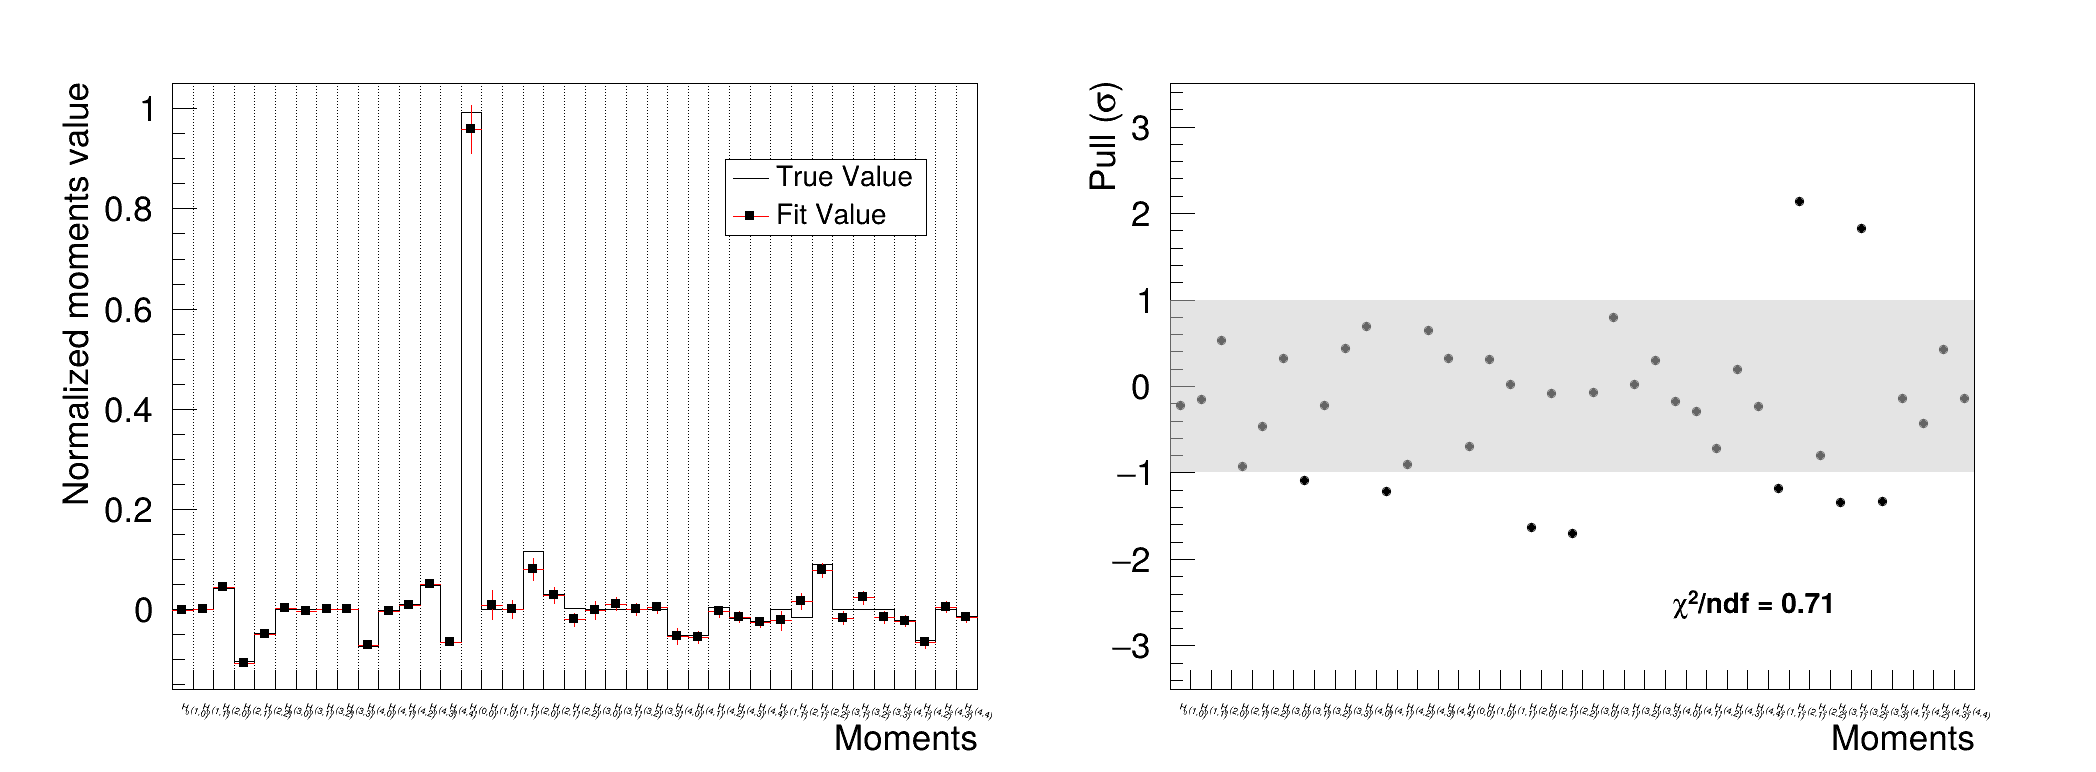

In [14]:
%jsroot off
canvas_MomentComparison = ROOT.TCanvas("canvas_MomentComparison", "Moment Comparison", 2100, 800)
canvas_MomentComparison.Divide(2, 1)
canvas_MomentComparison.cd(1)
ROOT.gPad.SetGridx()
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
h1_true_value.SetLineColor(ROOT.kBlack)
h1_true_value.SetLineWidth(1)
h1_true_value.SetTitle("")
h1_true_value.GetYaxis().SetTitle("Normalized moments value")
h1_true_value.GetXaxis().SetTitle("Moments")
h1_true_value.GetYaxis().SetTitleSize(0.05)
h1_true_value.GetYaxis().SetTitleOffset(1.2)
h1_true_value.GetXaxis().SetTitleSize(0.05)
h1_true_value.GetXaxis().SetTitleOffset(0.8)
h1_true_value.GetXaxis().SetLabelSize(0.02)
h1_true_value.GetXaxis().SetLabelOffset(0.01)
h1_true_value.GetYaxis().SetLabelSize(0.05)
h1_true_value.GetYaxis().SetLabelOffset(0.02)
h1_true_value.Draw("HIST")

h1_fit_value.SetLineColor(ROOT.kRed)
h1_fit_value.SetLineWidth(1)
h1_fit_value.SetMarkerStyle(21)
h1_fit_value.SetMarkerSize(1.2)
h1_fit_value.Draw("P SAME")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.8)
# legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h1_true_value, "True Value", "l")
legend.AddEntry(h1_fit_value, "Fit Value", "pl")
legend.Draw("SAME")

canvas_MomentComparison.cd(2)
# ROOT.gPad.SetGridx()
h1_pull_value.SetTitle("")
h1_pull_value.GetYaxis().SetTitle("Pull (#sigma)")
h1_pull_value.GetYaxis().SetTitleSize(0.05)
h1_pull_value.GetYaxis().SetTitleOffset(0.8)
h1_pull_value.GetXaxis().SetTitle("Moments")
h1_pull_value.GetXaxis().SetTitleSize(0.05)
h1_pull_value.GetXaxis().SetTitleOffset(0.8)
h1_pull_value.GetXaxis().SetLabelSize(0.02)
h1_pull_value.GetXaxis().SetLabelOffset(0.01)
h1_pull_value.GetYaxis().SetLabelSize(0.05)
h1_pull_value.GetYaxis().SetLabelOffset(0.02)
h1_pull_value.SetMarkerSize(1.2)
h1_pull_value.SetMarkerStyle(20)
h1_pull_value.GetYaxis().SetRangeUser(-3.5, 3.5)
h1_pull_value.Draw("P")

TBox = ROOT.TBox(-0.5, -1, len(moments_dict)-0.5, 1)
TBox.SetFillColorAlpha(ROOT.kGray,0.5)
# TBox.SetFillStyle(3001)
TBox.SetLineColor(ROOT.kWhite)
TBox.SetLineWidth(0)
TBox.Draw("SAME")

latex = ROOT.TLatex()
latex.SetTextSize(0.04)
latex.SetTextAlign(11)
latex.DrawLatexNDC(0.6, 0.2, "#chi^{2}/ndf = %.2f" % (chi2/ndf))


canvas_MomentComparison.Draw()

# canvas_MomentComparison.SaveAs(outPdfDir + "MomentComparison_IO_test_NoPWaves.pdf")

In [15]:
# Moments inversion to amplitudes I/O test
# The root file is generated from the brufit with the following command
# brufit -b -x -q Load.C RunGivenBruMoments.C

Mom2AmpsDir = "/d/grid17/septian/Moments2Amplitudes/brufit/"

# Generated SD waves with P waves fixed to 0 when estimating the amplitudes
Mom2AmpsFileName = "resultsGivenBruMomentsNoH3_data_SDWaves_10000Sample_NoPWaves.root"

# Generated SD waves with P waves freed when estimating the amplitudes
# Mom2AmpsFileName = "resultsGivenBruMomentsNoH3_data_test_10000Sample.root"

# Generated SPD waves with only S waves phases fixed to 0 when estimating the amplitudes
# Mom2AmpsFileName = "resultsGivenBruMomentsNoH3_data_test.root"
# Mom2AmpsFileName = "resultsGivenBruMomentsNoH3_data_test_S^+-_0_0_initialized.root"

In [16]:
# S-D waves
# Define amplitude values using a list of dictionaries
amplitude_values = [
    {"refl": -1, "l": 0, "m": 0, "val": 0.5 + 0.0j},   # S_0^-
    {"refl": -1, "l": 1, "m": -1, "val": 0.0}, # P_-1^-
    {"refl": -1, "l": 1, "m": 0, "val": 0.0},   # P_0^-
    {"refl": -1, "l": 1, "m": 1, "val": 0.0},  # P_+1^-
    {"refl": -1, "l": 2, "m": -2, "val":0.1 - 0.4j},  # D_-2^-
    {"refl": -1, "l": 2, "m": -1, "val":0.5 + 0.2j},  # D_-1^-
    {"refl": -1, "l": 2, "m": 0, "val": -0.1 - 0.2j},  # D_0^-
    {"refl": -1, "l": 2, "m": 1, "val": 0.2 - 0.1j},   # D_+1^-
    {"refl": -1, "l": 2, "m": 2, "val": -0.2 + 0.3j},  # D_+2^-
    # Positive-reflectivity waves
    {"refl": 1, "l": 0, "m": 0, "val": 1.0 + 0.0j},    # S_0^+
    {"refl": 1, "l": 1, "m": -1, "val": 0.0 },   # P_-1^+
    {"refl": 1, "l": 1, "m": 0, "val": 0.0 },   # P_0^+
    {"refl": 1, "l": 1, "m": 1, "val": 0.0 },    # P_+1^+
    {"refl": 1, "l": 2, "m": -2, "val":0.2 + 0.1j},   # D_-2^+
    {"refl": 1, "l": 2, "m": -1, "val":0.2 - 0.3j},   # D_-1^+
    {"refl": 1, "l": 2, "m": 0, "val": 0.1 - 0.2j},    # D_0^+
    {"refl": 1, "l": 2, "m": 1, "val": 0.2 + 0.5j},    # D_+1^+
    {"refl": 1, "l": 2, "m": 2, "val": -0.3 - 0.1j},   # D_+2^+
]

# Calculate the sum of squared magnitudes
total_magnitude_squared = sum(abs(amp["val"])**2 for amp in amplitude_values)

# Calculate the normalization factor
normalization_factor = math.sqrt(total_magnitude_squared)

# Normalize the amplitudes
for amp in amplitude_values:
    amp["val"] /= normalization_factor

# Convert to magnitude and phase
for amp in amplitude_values:
    magnitude = abs(amp["val"])  # Magnitude of the complex number
    phase = math.atan2(amp["val"].imag, amp["val"].real)  # Phase in radians
    amp["magnitude"] = magnitude
    amp["phase"] = phase

# Print the results
for amp in amplitude_values:
    print(f"Reflectivity: {amp['refl']}, l: {amp['l']}, m: {amp['m']}, "
          f"Magnitude: {amp['magnitude']:.3f}, Phase: {amp['phase']:.3f} radians")

Reflectivity: -1, l: 0, m: 0, Magnitude: 0.312, Phase: 0.000 radians
Reflectivity: -1, l: 1, m: -1, Magnitude: 0.000, Phase: 0.000 radians
Reflectivity: -1, l: 1, m: 0, Magnitude: 0.000, Phase: 0.000 radians
Reflectivity: -1, l: 1, m: 1, Magnitude: 0.000, Phase: 0.000 radians
Reflectivity: -1, l: 2, m: -2, Magnitude: 0.258, Phase: -1.326 radians
Reflectivity: -1, l: 2, m: -1, Magnitude: 0.337, Phase: 0.381 radians
Reflectivity: -1, l: 2, m: 0, Magnitude: 0.140, Phase: -2.034 radians
Reflectivity: -1, l: 2, m: 1, Magnitude: 0.140, Phase: -0.464 radians
Reflectivity: -1, l: 2, m: 2, Magnitude: 0.225, Phase: 2.159 radians
Reflectivity: 1, l: 0, m: 0, Magnitude: 0.625, Phase: 0.000 radians
Reflectivity: 1, l: 1, m: -1, Magnitude: 0.000, Phase: 0.000 radians
Reflectivity: 1, l: 1, m: 0, Magnitude: 0.000, Phase: 0.000 radians
Reflectivity: 1, l: 1, m: 1, Magnitude: 0.000, Phase: 0.000 radians
Reflectivity: 1, l: 2, m: -2, Magnitude: 0.140, Phase: 0.464 radians
Reflectivity: 1, l: 2, m: -1, M

In [17]:
fMom2Amps = ROOT.TFile(Mom2AmpsDir + Mom2AmpsFileName)
fMom2Amps.ls()

TFile**		/d/grid17/septian/Moments2Amplitudes/brufit/resultsGivenBruMomentsNoH3_data_SDWaves_10000Sample_NoPWaves.root	
 TFile*		/d/grid17/septian/Moments2Amplitudes/brufit/resultsGivenBruMomentsNoH3_data_SDWaves_10000Sample_NoPWaves.root	
  KEY: TTree	PartialWaves;1	pw


In [18]:
Mom2AmpsDF = ROOT.RDataFrame("PartialWaves", Mom2AmpsDir + Mom2AmpsFileName)
# print column names vertically
for col in Mom2AmpsDF.GetColumnNames():
    print(col)
    

H_0_0_0
H_0_1_0
H_0_1_1
H_0_2_0
H_0_2_1
H_0_2_2
H_0_3_0
H_0_3_1
H_0_3_2
H_0_3_3
H_0_4_0
H_0_4_1
H_0_4_2
H_0_4_3
H_0_4_4
H_1_0_0
H_1_1_0
H_1_1_1
H_1_2_0
H_1_2_1
H_1_2_2
H_1_3_0
H_1_3_1
H_1_3_2
H_1_3_3
H_1_4_0
H_1_4_1
H_1_4_2
H_1_4_3
H_1_4_4
H_2_1_1
H_2_2_1
H_2_2_2
H_2_3_1
H_2_3_2
H_2_3_3
H_2_4_1
H_2_4_2
H_2_4_3
H_2_4_4
a_0_0
a_2_0
a_2_1
a_2_2
a_2_m1
a_2_m2
aphi_2_0
aphi_2_1
aphi_2_2
aphi_2_m1
aphi_2_m2
b_0_0
b_2_0
b_2_1
b_2_2
b_2_m1
b_2_m2
bphi_2_0
bphi_2_1
bphi_2_2
bphi_2_m1
bphi_2_m2
log_val
normalise
sumMags
val


In [19]:
min_logchi2 = Mom2AmpsDF.Min("log_val").GetValue()
print("Minimum log chi2: ", min_logchi2)
min_logchi2 += 0.0001

Minimum log chi2:  -6.309858070244372


In [20]:
# best fit values is the value with minimum log chi2

best_fit_values = Mom2AmpsDF.Filter("log_val <= %f" % min_logchi2).AsNumpy()    

In [21]:
for key in best_fit_values:
    print(key, best_fit_values[key])


H_0_0_0 [-2.]
H_0_1_0 [0.00284151]
H_0_1_1 [0.00118953]
H_0_2_0 [-0.04400018]
H_0_2_1 [0.10695005]
H_0_2_2 [0.04967885]
H_0_3_0 [-0.00251415]
H_0_3_1 [0.00610981]
H_0_3_2 [0.0011656]
H_0_3_3 [-0.00220287]
H_0_4_0 [0.07190041]
H_0_4_1 [0.00439818]
H_0_4_2 [-0.00832733]
H_0_4_3 [-0.04975565]
H_0_4_4 [0.06480613]
H_1_0_0 [-0.95995837]
H_1_1_0 [-0.01824438]
H_1_1_1 [-0.0006834]
H_1_2_0 [-0.08055987]
H_1_2_1 [-0.02865936]
H_1_2_2 [0.02100284]
H_1_3_0 [0.00276719]
H_1_3_1 [-0.02106891]
H_1_3_2 [-0.00064717]
H_1_3_3 [-0.00697856]
H_1_4_0 [0.05429259]
H_1_4_1 [0.05555215]
H_1_4_2 [0.00523571]
H_1_4_3 [0.0156763]
H_1_4_4 [0.02673328]
H_2_1_1 [0.04432532]
H_2_2_1 [-0.01668776]
H_2_2_2 [-0.07842638]
H_2_3_1 [0.03399124]
H_2_3_2 [-0.04791365]
H_2_3_3 [0.03066805]
H_2_4_1 [0.02289453]
H_2_4_2 [0.06661954]
H_2_4_3 [-0.00577773]
H_2_4_4 [0.01494739]
a_0_0 [0.14347765]
a_2_0 [0.39491649]
a_2_1 [0.49780835]
a_2_2 [0.28067264]
a_2_m1 [0.14413403]
a_2_m2 [0.14092597]
aphi_2_0 [2.40130147]
aphi_2_1 [0.380

In [22]:
mom2amplitude_values = {}

best_fit_val_i = 0

for key in best_fit_values:
    if len(key.split("_")) == 3:
        reflphi, lstring, mstring = key.split("_")
        refl, l, m = 0, int(lstring), 0
        phi = 0.0
        mag = 0.0

        if reflphi.startswith("b"):
            refl = -1
        elif reflphi.startswith("a"):
            refl = 1

        if "m" in mstring:
            m = int(mstring.replace("m", "-"))
        else:
            m = int(mstring)

        if (refl, l, m) not in mom2amplitude_values:
            mom2amplitude_values[(refl, l, m)] = {"refl": refl, "l": l, "m": m, "Phase": 0.0, "Magnitude": 0.0}

        if "phi" in reflphi:
            mom2amplitude_values[(refl, l, m)]["Phase"] = float(best_fit_values[key][best_fit_val_i])
        else:
            mom2amplitude_values[(refl, l, m)]["Magnitude"] = float(best_fit_values[key][best_fit_val_i])


mom2amplitude_values_list = list(mom2amplitude_values.values())

# Print the results
for amp in mom2amplitude_values_list:
    print(amp)

{'refl': 1, 'l': 0, 'm': 0, 'Phase': 0.0, 'Magnitude': 0.14347764894979595}
{'refl': 1, 'l': 2, 'm': 0, 'Phase': 2.401301465079892, 'Magnitude': 0.3949164940156947}
{'refl': 1, 'l': 2, 'm': 1, 'Phase': 0.380066637052936, 'Magnitude': 0.4978083494737441}
{'refl': 1, 'l': 2, 'm': 2, 'Phase': -2.630145747314575, 'Magnitude': 0.28067264033878203}
{'refl': 1, 'l': 2, 'm': -1, 'Phase': -2.693760582733542, 'Magnitude': 0.14413402723547458}
{'refl': 1, 'l': 2, 'm': -2, 'Phase': 0.5836846598903387, 'Magnitude': 0.14092596677749805}
{'refl': -1, 'l': 0, 'm': 0, 'Phase': 0.0, 'Magnitude': 0.06058919865434489}
{'refl': -1, 'l': 2, 'm': 0, 'Phase': 1.047616861109299, 'Magnitude': 0.17271456182811273}
{'refl': -1, 'l': 2, 'm': 1, 'Phase': 2.890218715021766, 'Magnitude': 0.440353102938051}
{'refl': -1, 'l': 2, 'm': 2, 'Phase': -0.6420398516413744, 'Magnitude': 0.29955993576513057}
{'refl': -1, 'l': 2, 'm': -1, 'Phase': -2.7832408210113058, 'Magnitude': 0.2611917778966682}
{'refl': -1, 'l': 2, 'm': -2

In [23]:
h2_log_val_a_0_0 = Mom2AmpsDF.Histo2D(("h2_log_val_a_0_0", "log val a_0_0", 100, -10, 0, 100, 0, 1.0), "log_val", "a_0_0")
h2_log_val_b_0_0 = Mom2AmpsDF.Histo2D(("h2_log_val_b_0_0", "log val b_0_0", 100, -10, 0, 100, 0, 1.0), "log_val", "b_0_0")

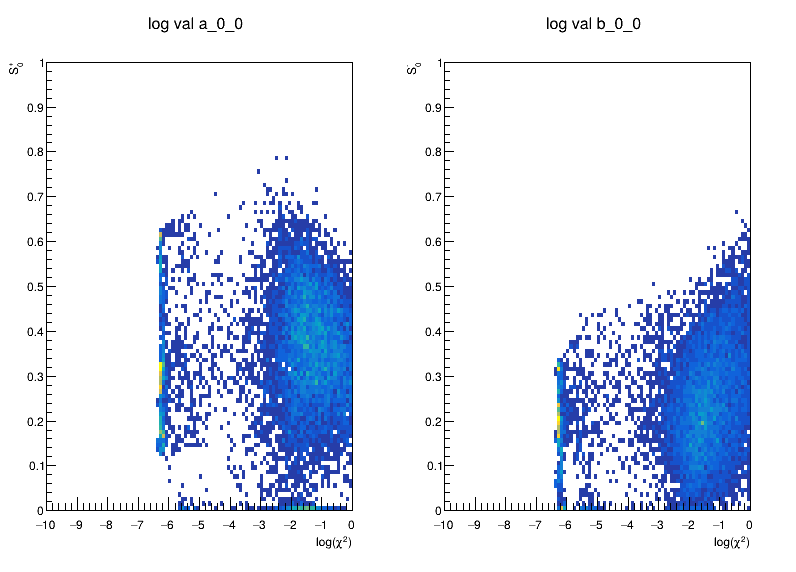

In [24]:
canvas_Mom2Amps = ROOT.TCanvas("canvas_Mom2Amps", "Mom2Amps", 800, 600)
canvas_Mom2Amps.Divide(2, 1)
canvas_Mom2Amps.cd(1)
h2_log_val_a_0_0.GetXaxis().SetTitle("log(#chi^{2})")
h2_log_val_a_0_0.GetYaxis().SetTitle("S^{+}_{0}")
h2_log_val_a_0_0.Draw()

canvas_Mom2Amps.cd(2)
h2_log_val_b_0_0.GetXaxis().SetTitle("log(#chi^{2})")
h2_log_val_b_0_0.GetYaxis().SetTitle("S^{-}_{0}")
h2_log_val_b_0_0.Draw()

canvas_Mom2Amps.Draw()
# canvas_Mom2Amps.SaveAs(outPdfDir + "Amplitudes_S_0_0_Chi2_GeneratedSDWaves_PwavesFixed0.pdf")

In [25]:
# commented when we fixed P waves to 0

# h2_log_val_a_1_0 = Mom2AmpsDF.Histo2D(("h2_log_val_a_1_0", "log val a_1_0", 100, -10, -8, 100, 0, 0.6), "log_val", "a_1_0")
# h2_log_val_b_1_0 = Mom2AmpsDF.Histo2D(("h2_log_val_b_1_0", "log val b_1_0", 100, -10, -8, 100, 0, 0.6), "log_val", "b_1_0")

# h2_log_val_a_1_m1 = Mom2AmpsDF.Histo2D(("h2_log_val_a_1_m1", "log val a_1_m1", 100, -10, -8, 100, 0, 0.6), "log_val", "a_1_m1")
# h2_log_val_b_1_m1 = Mom2AmpsDF.Histo2D(("h2_log_val_b_1_m1", "log val b_1_m1", 100, -10, -8, 100, 0, 0.6), "log_val", "b_1_m1")

# h2_log_val_a_1_1 = Mom2AmpsDF.Histo2D(("h2_log_val_a_1_1", "log val a_1_1", 100, -10, -8, 100, 0, 0.6), "log_val", "a_1_1")
# h2_log_val_b_1_1 = Mom2AmpsDF.Histo2D(("h2_log_val_b_1_1", "log val b_1_1", 100, -10, -8, 100, 0, 0.6), "log_val", "b_1_1")

In [26]:
# ROOT.gStyle.SetOptTitle(0)

# canvas_Mom2Amps.Clear()
# canvas_Mom2Amps.SetWindowSize(1800,1200)
# canvas_Mom2Amps.Divide(3, 2)
# canvas_Mom2Amps.cd(1)
# h2_log_val_a_1_0.GetXaxis().SetTitle("log(#chi^{2})")
# h2_log_val_a_1_0.GetYaxis().SetTitle("P_{0}^{+}")
# h2_log_val_a_1_0.Draw()

# canvas_Mom2Amps.cd(2)
# h2_log_val_a_1_m1.GetXaxis().SetTitle("log(#chi^{2})")
# h2_log_val_a_1_m1.GetYaxis().SetTitle("P_{-1}^{+}")
# h2_log_val_a_1_m1.Draw()

# canvas_Mom2Amps.cd(3)
# h2_log_val_a_1_1.GetXaxis().SetTitle("log(#chi^{2})")
# h2_log_val_a_1_1.GetYaxis().SetTitle("P_{1}^{+}")
# h2_log_val_a_1_1.Draw()

# canvas_Mom2Amps.cd(4)
# h2_log_val_b_1_0.GetXaxis().SetTitle("log(#chi^{2})")
# h2_log_val_b_1_0.GetYaxis().SetTitle("P_{0}^{-}")
# h2_log_val_b_1_0.Draw()

# canvas_Mom2Amps.cd(5)
# h2_log_val_b_1_0.GetXaxis().SetTitle("log(#chi^{2})")
# h2_log_val_b_1_0.GetYaxis().SetTitle("P_{0}^{-}")
# h2_log_val_b_1_0.Draw()

# canvas_Mom2Amps.Draw()
# canvas_Mom2Amps.SaveAs(outPdfDir + "Amplitudes_Pwaves_Chi2.pdf")

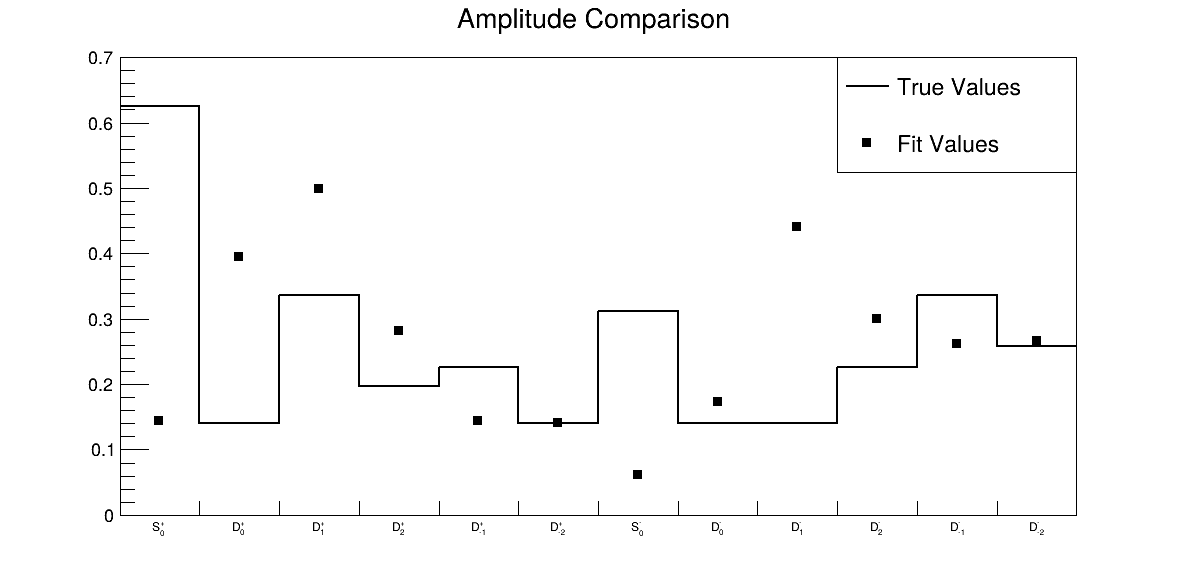

In [27]:
h1_true_amplitude = ROOT.TH1F("h1_true_amplitude", "Amplitude Comparison", len(mom2amplitude_values_list), -0.5, len(mom2amplitude_values_list) - 0.5)
h1_fit_amplitude = ROOT.TH1F("h1_fit_amplitude", "Amplitude Comparison", len(mom2amplitude_values_list), -0.5, len(mom2amplitude_values_list) - 0.5)

true_values_map = {(amp["refl"], amp["l"], amp["m"]): amp["magnitude"] for amp in amplitude_values}


for i, fit_amp in enumerate(mom2amplitude_values_list):
    l_label = {0: "S", 1: "P", 2: "D"}.get(fit_amp["l"], f"L{fit_amp['l']}") 
    refl_label = "+" if fit_amp["refl"] == 1 else "-"
    label = f"{l_label}^{{{refl_label}}}_{{{fit_amp['m']}}}"

    h1_true_amplitude.GetXaxis().SetBinLabel(i + 1, label)
    h1_fit_amplitude.GetXaxis().SetBinLabel(i + 1, label)

    true_value = true_values_map.get((fit_amp["refl"], fit_amp["l"], fit_amp["m"]), 0.0)
    h1_true_amplitude.SetBinContent(i + 1, true_value)
    h1_fit_amplitude.SetBinContent(i + 1, fit_amp["Magnitude"])

h1_true_amplitude.SetLineColor(ROOT.kBlack)
h1_true_amplitude.SetLineWidth(2)
h1_fit_amplitude.SetLineColor(ROOT.kRed)
h1_fit_amplitude.SetLineWidth(2)
h1_fit_amplitude.SetMarkerStyle(21)
h1_fit_amplitude.SetMarkerSize(1.2)

canvas_amplitude_comparison = ROOT.TCanvas("canvas_amplitude_comparison", "Amplitude Comparison", 1200, 600)
h1_true_amplitude.GetYaxis().SetRangeUser(0.0,0.7)
h1_true_amplitude.Draw("HIST")
h1_fit_amplitude.Draw("P SAME")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(h1_true_amplitude, "True Values", "l")
legend.AddEntry(h1_fit_amplitude, "Fit Values", "p")
legend.Draw()

canvas_amplitude_comparison.Draw()

# canvas_amplitude_comparison.SaveAs(outPdfDir + "AmplitudeComparison_normalized.pdf")

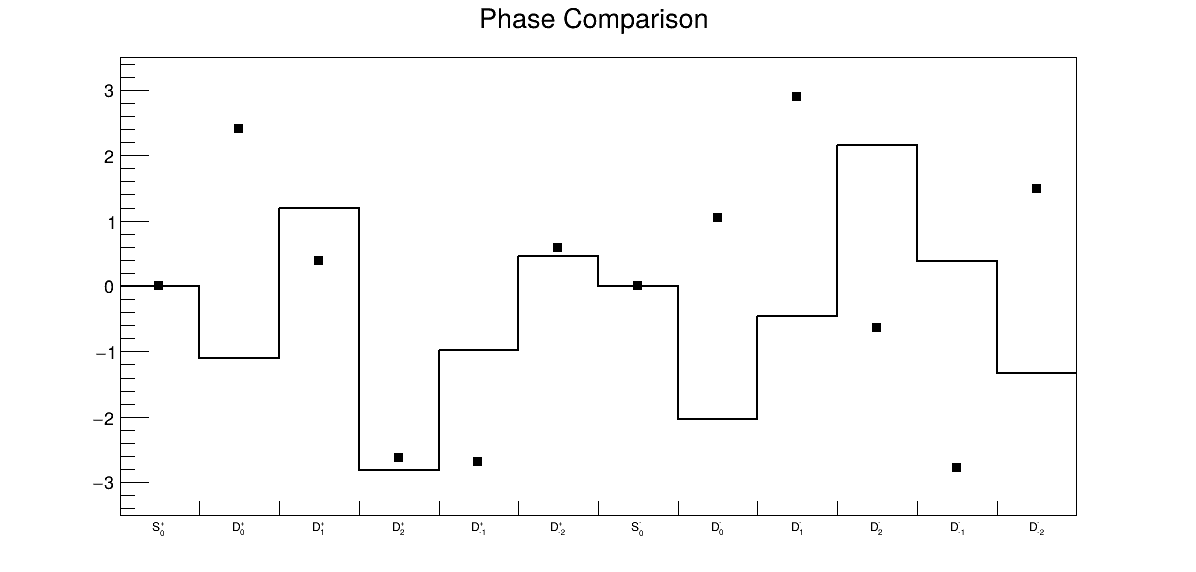

In [28]:
h1_true_phase = ROOT.TH1F("h1_true_phase", "Phase Comparison", len(mom2amplitude_values_list), -0.5, len(mom2amplitude_values_list) - 0.5)
h1_fit_phase = ROOT.TH1F("h1_fit_phase", "Phase Comparison", len(mom2amplitude_values_list), -0.5, len(mom2amplitude_values_list) - 0.5)

true_phase_map = {(amp["refl"], amp["l"], amp["m"]): amp["phase"] for amp in amplitude_values}

for i, fit_amp in enumerate(mom2amplitude_values_list):
    l_label = {0: "S", 1: "P", 2: "D"}.get(fit_amp["l"], f"L{fit_amp['l']}")
    refl_label = "+" if fit_amp["refl"] == 1 else "-"
    label = f"{l_label}^{{{refl_label}}}_{{{fit_amp['m']}}}"

    h1_true_phase.GetXaxis().SetBinLabel(i + 1, label)
    h1_fit_phase.GetXaxis().SetBinLabel(i + 1, label)

    true_phase = true_phase_map.get((fit_amp["refl"], fit_amp["l"], fit_amp["m"]), 0.0)
    h1_true_phase.SetBinContent(i + 1, true_phase)
    h1_fit_phase.SetBinContent(i + 1, fit_amp["Phase"])

h1_true_phase.SetLineColor(ROOT.kBlack)
h1_true_phase.SetLineWidth(2)
h1_fit_phase.SetLineColor(ROOT.kBlue)
h1_fit_phase.SetLineWidth(2)
h1_fit_phase.SetMarkerStyle(21)
h1_fit_phase.SetMarkerSize(1.2)

canvas_phase_comparison = ROOT.TCanvas("canvas_phase_comparison", "Phase Comparison", 1200, 600)
h1_true_phase.GetYaxis().SetRangeUser(-3.5,3.5)
h1_true_phase.Draw("HIST")
h1_fit_phase.Draw("P SAME")

canvas_phase_comparison.Draw()

# canvas_phase_comparison.SaveAs(outPdfDir + "PhaseComparison_normalized.pdf")

In [29]:
# setup for MCMC fit results
# ROOTFileDir = "/d/home/septian/EtaPi0Analysis/MomentMCStudy/fitMoments_GlueXAcceptanceSigBkgLM3_MCMCN4000BI1000S08/"
# MCMC1DStepFileName = "ResultsBruMcmcCovariance1DStep.root"
# MCMCNDStepFileName = "ResultsBruMcmcCovarianceNDStep.root"
# MCMCCovarianceFileName = "ResultsBruMcmcCovariance.root"
# trueValuejsonFile = "/d/home/septian/EtaPi0Analysis/MomentMCStudy/trueMomentValues.json"


In [30]:
# file1DStep = ROOT.TFile(ROOTFileDir + MCMC1DStepFileName)
# fileNDStep = ROOT.TFile(ROOTFileDir + MCMCNDStepFileName)
# fileCovariance = ROOT.TFile(ROOTFileDir + MCMCCovarianceFileName)

In [31]:
# file1DStep.ls()
# # Create data frame from MCMC TTree
# df1DStep = ROOT.RDataFrame("MCMCTree", ROOTFileDir + MCMC1DStepFileName)
# MCMCNEntries = df1DStep.Count().GetValue()
# print("Number of entries in MCMC TTree: ", MCMCNEntries)

In [32]:
# fileNDStep.ls()
# dfNDStep = ROOT.RDataFrame("MCMCTree", ROOTFileDir + MCMCNDStepFileName)

In [33]:
# fileCovariance.ls()
# dfCovariance = ROOT.RDataFrame("MCMCTree", ROOTFileDir + MCMCCovarianceFileName)

In [34]:

# def GetMCMCTraceHist(df, var_name):
#     entries = df.Count().GetValue()
#     hist_name = f"h1_MCMCTrace_{var_name}"
#     hist_title = f"MCMC Trace {var_name}"
#     hist = df.Histo1D((hist_name, hist_title, entries, -0.5, entries-0.5), "entry", var_name)
#     hist.SetTitle(hist_title)
#     hist.GetXaxis().SetTitle("Steps")
#     hist.GetXaxis().SetTitleSize(0.05)
#     var_parts = var_name.split("_")
#     if len(var_parts) == 4:
#         H, alpha, L, M = var_parts
#         hist.GetYaxis().SetTitle("H_{"+alpha+"}("+L+","+M+")")
#     else:
#         hist.GetYaxis().SetTitle(var_name)
#     hist.GetYaxis().SetTitleSize(0.05)
#     return hist
    
# def GetParameterDistribution(df, var_name):
#     hist_name = f"h1_MCMCDistribution_{var_name}"
#     xmin = df.Min(var_name).GetValue()
#     xmax = df.Max(var_name).GetValue()
#     hist = df.Histo1D(var_name)
#     hist.GetXaxis().SetTitle(ROOT.TString(var_name).Data())
#     hist.GetXaxis().SetTitleSize(0.05)
#     var_parts = var_name.split("_")
#     if len(var_parts) == 4:
#         H, alpha, L, M = var_parts
#         hist.GetXaxis().SetTitle("H_{"+alpha+"}("+L+","+M+")")
#         hist.SetTitle("")
#     else:
#         hist.GetXaxis().SetTitle(var_name)
#     hist.GetYaxis().SetTitleSize(0.05)
#     return hist

In [35]:
# h1_MCMCTrace_1DStep_H_0_2_1 = GetMCMCTraceHist(df1DStep, "H_0_2_1")
# h1_MCMCTrace_NDStep_H_0_2_1 = GetMCMCTraceHist(dfNDStep, "H_0_2_1")
# h1_MCMCTrace_Covariance_H_0_2_1 = GetMCMCTraceHist(dfCovariance, "H_0_2_1")

# h1_MCMCTrace_1DStep_H_0_2_2 = GetMCMCTraceHist(df1DStep, "H_0_2_2")
# h1_MCMCTrace_NDStep_H_0_2_2 = GetMCMCTraceHist(dfNDStep, "H_0_2_2")
# h1_MCMCTrace_Covariance_H_0_2_2 = GetMCMCTraceHist(dfCovariance, "H_0_2_2")

In [36]:
# canvas_H_0_2_1_H_0_2_2 = ROOT.TCanvas("canvas_H_0_2_1_H_0_2_2", "MCMC Trace H_0_2_1 and H_0_2_2", 1800, 1200)
# canvas_H_0_2_1_H_0_2_2.Divide(3, 2)


In [37]:
# true_H_0_2_1 = -0.07915100246084726*2
# true_H_0_2_2 = -0.06395209915477651*2
# burn_in_period = 1000

# canvas_H_0_2_1_H_0_2_2.cd(1)
# h1_MCMCTrace_1DStep_H_0_2_1.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_1DStep_H_0_2_1.SetLineWidth(2)
# h1_MCMCTrace_1DStep_H_0_2_1.SetTitle("1D Step Chain")
# h1_MCMCTrace_1DStep_H_0_2_1.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_1DStep_H_0_2_1.Draw("HIST")
# ROOT.gPad.SetLeftMargin(0.15)
# ROOT.gPad.SetRightMargin(0.05)
# TLine_H_0_2_1 = ROOT.TLine(-0.5, true_H_0_2_1, 1200.5, true_H_0_2_1)
# TLine_H_0_2_1.SetLineColor(ROOT.kRed)
# TLine_H_0_2_1.SetLineWidth(2)
# TLine_H_0_2_1.SetLineStyle(2)
# TLine_H_0_2_1.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2.cd(2)
# h1_MCMCTrace_NDStep_H_0_2_1.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_NDStep_H_0_2_1.SetLineWidth(2)
# h1_MCMCTrace_NDStep_H_0_2_1.SetTitle("ND Step Chain")
# h1_MCMCTrace_NDStep_H_0_2_1.Draw("HIST")
# TLine_H_0_2_1 = ROOT.TLine(-0.5, true_H_0_2_1, 6000.5, true_H_0_2_1)
# TLine_H_0_2_1.SetLineColor(ROOT.kRed)
# TLine_H_0_2_1.SetLineWidth(2)
# TLine_H_0_2_1.SetLineStyle(2)
# TLine_H_0_2_1.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2.cd(3)
# h1_MCMCTrace_Covariance_H_0_2_1.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_Covariance_H_0_2_1.SetLineWidth(2)
# h1_MCMCTrace_Covariance_H_0_2_1.SetTitle("Covariance Matrix Step Chain")
# h1_MCMCTrace_Covariance_H_0_2_1.Draw("HIST")
# TLine_H_0_2_1 = ROOT.TLine(-0.5, true_H_0_2_1, 1000.5, true_H_0_2_1)
# TLine_H_0_2_1.SetLineColor(ROOT.kRed)
# TLine_H_0_2_1.SetLineWidth(2)
# TLine_H_0_2_1.SetLineStyle(2)
# TLine_H_0_2_1.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2.cd(4)
# h1_MCMCTrace_1DStep_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_1DStep_H_0_2_2.SetLineWidth(2)
# h1_MCMCTrace_1DStep_H_0_2_2.SetTitle("")
# h1_MCMCTrace_1DStep_H_0_2_2.Draw("HIST")
# ROOT.gPad.SetLeftMargin(0.15)
# ROOT.gPad.SetRightMargin(0.05)
# TLine_H_0_2_2 = ROOT.TLine(-0.5, true_H_0_2_2, 1200.5, true_H_0_2_2)
# TLine_H_0_2_2.SetLineColor(ROOT.kRed)
# TLine_H_0_2_2.SetLineWidth(2)
# TLine_H_0_2_2.SetLineStyle(2)
# TLine_H_0_2_2.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2.cd(5)
# h1_MCMCTrace_NDStep_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_NDStep_H_0_2_2.SetLineWidth(2)
# h1_MCMCTrace_NDStep_H_0_2_2.SetTitle("")
# h1_MCMCTrace_NDStep_H_0_2_2.Draw("HIST")
# TLine_H_0_2_2 = ROOT.TLine(-0.5, true_H_0_2_2, 6000.5, true_H_0_2_2)
# TLine_H_0_2_2.SetLineColor(ROOT.kRed)
# TLine_H_0_2_2.SetLineWidth(2)
# TLine_H_0_2_2.SetLineStyle(2)
# TLine_H_0_2_2.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2.cd(6)
# h1_MCMCTrace_Covariance_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_Covariance_H_0_2_2.SetLineWidth(2)
# h1_MCMCTrace_Covariance_H_0_2_2.SetTitle("")
# h1_MCMCTrace_Covariance_H_0_2_2.Draw("HIST")
# TLine_H_0_2_2 = ROOT.TLine(-0.5, true_H_0_2_2, 1000.5, true_H_0_2_2)
# TLine_H_0_2_2.SetLineColor(ROOT.kRed)
# TLine_H_0_2_2.SetLineWidth(2)
# TLine_H_0_2_2.SetLineStyle(2)
# TLine_H_0_2_2.DrawClone("SAME")


# canvas_H_0_2_1_H_0_2_2.Draw()


In [38]:
# canvas_H_0_2_1_H_0_2_2.SaveAs(outPdfDir + "MCMCTrace_H_0_2_1_H_0_2_2.pdf")

In [39]:
# h1_MCMCDistribution_Covariance_H_0_2_1 = GetParameterDistribution(dfCovariance, "H_0_2_1")
# h1_MCMCDistribution_Covariance_H_0_2_2 = GetParameterDistribution(dfCovariance, "H_0_2_2")

In [40]:
# canvas_H_0_2_1_H_0_2_2_Distribution = ROOT.TCanvas("canvas_H_0_2_1_H_0_2_2_Distribution", "MCMC Distribution H_0_2_1 and H_0_2_2", 600, 1200)
# canvas_H_0_2_1_H_0_2_2_Distribution.Divide(1, 2)
# canvas_H_0_2_1_H_0_2_2_Distribution.cd(1)
# h1_MCMCDistribution_Covariance_H_0_2_1.SetLineColor(ROOT.kBlack)
# h1_MCMCDistribution_Covariance_H_0_2_1.SetLineWidth(2)
# h1_MCMCDistribution_Covariance_H_0_2_1.Draw("PE")
# TLine_H_0_2_1 = ROOT.TLine(true_H_0_2_1, 0, true_H_0_2_1, h1_MCMCDistribution_Covariance_H_0_2_1.GetMaximum()*1.2)
# TLine_H_0_2_1.SetLineColor(ROOT.kRed)
# TLine_H_0_2_1.SetLineWidth(2)
# TLine_H_0_2_1.SetLineStyle(2)
# TLine_H_0_2_1.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2_Distribution.cd(2)
# h1_MCMCDistribution_Covariance_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCDistribution_Covariance_H_0_2_2.SetLineWidth(2)
# h1_MCMCDistribution_Covariance_H_0_2_2.Draw("PE")
# canvas_H_0_2_1_H_0_2_2_Distribution.Draw()
# TLine_H_0_2_2 = ROOT.TLine(true_H_0_2_2, 0, true_H_0_2_2, h1_MCMCDistribution_Covariance_H_0_2_2.GetMaximum()*1.2)
# TLine_H_0_2_2.SetLineColor(ROOT.kRed)
# TLine_H_0_2_2.SetLineWidth(2)
# TLine_H_0_2_2.SetLineStyle(2)
# TLine_H_0_2_2.DrawClone("SAME")

# canvas_H_0_2_1_H_0_2_2_Distribution.SaveAs(outPdfDir + "MCMCDistribution_H_0_2_1_H_0_2_2.pdf")


In [41]:
# canvas_H_0_2_2 = ROOT.TCanvas("canvas_H_0_2_2", "MCMC Trace H_0_2_2", 1800, 600)
# canvas_H_0_2_2.Divide(3, 1)
# canvas_H_0_2_2.cd(1)
# h1_MCMCTrace_1DStep_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_1DStep_H_0_2_2.SetLineWidth(2)
# h1_MCMCTrace_1DStep_H_0_2_2.Draw("HIST")
# canvas_H_0_2_2.cd(2)
# h1_MCMCTrace_NDStep_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_NDStep_H_0_2_2.SetLineWidth(2)
# h1_MCMCTrace_NDStep_H_0_2_2.Draw("HIST")
# canvas_H_0_2_2.cd(3)
# h1_MCMCTrace_Covariance_H_0_2_2.SetLineColor(ROOT.kBlack)
# h1_MCMCTrace_Covariance_H_0_2_2.SetLineWidth(2)
# h1_MCMCTrace_Covariance_H_0_2_2.Draw("HIST")
# canvas_H_0_2_2.Draw()

In [42]:
# Get list of variables from the MCMC TTree
# name_list = dfCovariance.GetColumnNames()
# print("List of variables in MCMC TTree: ", name_list)

In [43]:
# def GetFitValues(df, var_name):
#     h = GetParameterDistribution(df, var_name)
#     mean = h.GetMean()
#     rms = h.GetRMS()
#     return mean, rms

In [44]:
# fit_values = {}
# for var_name in name_list:
#     if var_name.startswith("H_"):
#         true_value = GetMomentsTrueValue(var_name)
#         mean, rms = GetFitValues(dfCovariance, var_name)
#         fit_values[var_name] = {
#             "true_value": true_value,
#             "fit_mean": mean,
#             "fit_rms": rms
#         }
#         # print(f"Variable: {var_name}, True Value: {true_value}, Mean: {mean}, RMS: {rms}")

In [45]:
# Draw comparison of true value and fit value
# h1_true_value = ROOT.TH1F("h1_true_value", "True Value", len(fit_values), -0.5, len(fit_values)-0.5)
# h1_fit_value = ROOT.TH1F("h1_fit_value", "Fit Value", len(fit_values), -0.5, len(fit_values)-0.5)

# for (i, var_name) in enumerate(fit_values.items()):
#     H, alpha, L, M = var_name[0].split("_")
#     h1_true_value.GetXaxis().SetBinLabel(i+1, "H_{"+alpha+"}("+L+","+M+")")
#     true_value = var_name[1]["true_value"]
#     fit_mean = var_name[1]["fit_mean"]
#     fit_rms = var_name[1]["fit_rms"]
#     h1_true_value.SetBinContent(i+1, 2*true_value)
#     h1_fit_value.SetBinContent(i+1, fit_mean)
#     h1_fit_value.SetBinError(i+1, fit_rms)

In [46]:
# Calculate pull values
# pull_values = {}
# for var_name in fit_values:
#     true_value = fit_values[var_name]["true_value"]
#     fit_mean = fit_values[var_name]["fit_mean"]
#     fit_rms = fit_values[var_name]["fit_rms"]
#     pull = (fit_mean - 2*true_value) / fit_rms
#     pull_values[var_name] = pull



In [47]:
# h1_pull_value = ROOT.TH1F("h1_pull_value", "Pull Value", len(fit_values), -0.5, len(fit_values)-0.5)
# chi2 = 0.0
# ndf = 0
# for (i, var_name) in enumerate(pull_values.items()):
#     H, alpha, L, M = var_name[0].split("_")
#     h1_pull_value.GetXaxis().SetBinLabel(i+1, "H_{"+alpha+"}("+L+","+M+")")
#     pull = var_name[1]
#     h1_pull_value.SetBinContent(i+1, pull)
#     h1_pull_value.SetBinError(i+1, 0.0)
#     chi2 += pull**2
#     ndf += 1

In [48]:

# canvas_MomentComparison = ROOT.TCanvas("canvas_MomentComparison", "Moment Comparison", 2100, 800)
# canvas_MomentComparison.Divide(2, 1)
# canvas_MomentComparison.cd(1)
# ROOT.gPad.SetGridx()
# ROOT.gPad.SetLeftMargin(0.15)
# ROOT.gPad.SetRightMargin(0.05)
# h1_true_value.SetLineColor(ROOT.kBlack)
# h1_true_value.SetLineWidth(1)
# h1_true_value.SetTitle("")
# h1_true_value.GetYaxis().SetTitle("Normalized moments value")
# h1_true_value.GetXaxis().SetTitle("Moments")
# h1_true_value.GetYaxis().SetTitleSize(0.05)
# h1_true_value.GetYaxis().SetTitleOffset(1.2)
# h1_true_value.GetXaxis().SetTitleSize(0.05)
# h1_true_value.GetXaxis().SetTitleOffset(0.8)
# h1_true_value.GetXaxis().SetLabelSize(0.02)
# h1_true_value.GetXaxis().SetLabelOffset(0.01)
# h1_true_value.GetYaxis().SetLabelSize(0.05)
# h1_true_value.GetYaxis().SetLabelOffset(0.02)
# h1_true_value.Draw("HIST")

# h1_fit_value.SetLineColor(ROOT.kRed)
# h1_fit_value.SetLineWidth(1)
# h1_fit_value.SetMarkerStyle(21)
# h1_fit_value.SetMarkerSize(1.2)
# h1_fit_value.Draw("P SAME")

# legend = ROOT.TLegend(0.7, 0.2, 0.9, 0.3)
# # legend.SetBorderSize(0)
# legend.SetTextSize(0.04)
# legend.AddEntry(h1_true_value, "True Value", "l")
# legend.AddEntry(h1_fit_value, "Fit Value", "pl")
# legend.Draw("SAME")

# canvas_MomentComparison.cd(2)
# # ROOT.gPad.SetGridx()
# h1_pull_value.SetTitle("")
# h1_pull_value.GetYaxis().SetTitle("Pull (#sigma)")
# h1_pull_value.GetYaxis().SetTitleSize(0.05)
# h1_pull_value.GetYaxis().SetTitleOffset(0.8)
# h1_pull_value.GetXaxis().SetTitle("Moments")
# h1_pull_value.GetXaxis().SetTitleSize(0.05)
# h1_pull_value.GetXaxis().SetTitleOffset(0.8)
# h1_pull_value.GetXaxis().SetLabelSize(0.02)
# h1_pull_value.GetXaxis().SetLabelOffset(0.01)
# h1_pull_value.GetYaxis().SetLabelSize(0.05)
# h1_pull_value.GetYaxis().SetLabelOffset(0.02)
# h1_pull_value.SetMarkerSize(1.2)
# h1_pull_value.SetMarkerStyle(20)
# h1_pull_value.GetYaxis().SetRangeUser(-3.5, 3.5)
# h1_pull_value.Draw("P")

# TBox = ROOT.TBox(-0.5, -1, len(fit_values)-0.5, 1)
# TBox.SetFillColorAlpha(ROOT.kGray,0.5)
# # TBox.SetFillStyle(3001)
# TBox.SetLineColor(ROOT.kWhite)
# TBox.SetLineWidth(0)
# TBox.Draw("SAME")

# latex = ROOT.TLatex()
# latex.SetTextSize(0.04)
# latex.SetTextAlign(11)
# latex.DrawLatexNDC(0.6, 0.2, "#chi^{2}/ndf = %.2f" % (chi2/ndf))


# canvas_MomentComparison.Draw()

# canvas_MomentComparison.SaveAs(outPdfDir + "MomentComparison_IO_test.pdf")

In [49]:

# # Define amplitude values using a list of dictionaries
# amplitude_values = [
#     {"refl": -1, "l": 0, "m": 0, "val": (1.0 + 0.0j)/4},   # S_0^-
#     {"refl": -1, "l": 1, "m": -1, "val":(-0.4 + 0.1j)/4}, # P_-1^-
#     {"refl": -1, "l": 1, "m": 0, "val": (0.3 - 0.8j)/4},   # P_0^-
#     {"refl": -1, "l": 1, "m": 1, "val": (-0.8 + 0.7j)/4},  # P_+1^-
#     {"refl": -1, "l": 2, "m": -2, "val":(0.1 - 0.4j)/4},  # D_-2^-
#     {"refl": -1, "l": 2, "m": -1, "val":(0.5 + 0.2j)/4},  # D_-1^-
#     {"refl": -1, "l": 2, "m": 0, "val": (-0.1 - 0.2j)/4},  # D_0^-
#     {"refl": -1, "l": 2, "m": 1, "val": (0.2 - 0.1j)/4},   # D_+1^-
#     {"refl": -1, "l": 2, "m": 2, "val": (-0.2 + 0.3j)/4},  # D_+2^-
#     # Positive-reflectivity waves
#     {"refl": 1, "l": 0, "m": 0, "val": (0.5 + 0.0j)/4},    # S_0^+
#     {"refl": 1, "l": 1, "m": -1, "val":(0.5 - 0.1j)/4},   # P_-1^+
#     {"refl": 1, "l": 1, "m": 0, "val": (-0.8 - 0.3j)/4},   # P_0^+
#     {"refl": 1, "l": 1, "m": 1, "val": (0.6 + 0.3j)/4},    # P_+1^+
#     {"refl": 1, "l": 2, "m": -2, "val":(0.2 + 0.1j)/4},   # D_-2^+
#     {"refl": 1, "l": 2, "m": -1, "val":(0.2 - 0.3j)/4},   # D_-1^+
#     {"refl": 1, "l": 2, "m": 0, "val": (0.1 - 0.2j)/4},    # D_0^+
#     {"refl": 1, "l": 2, "m": 1, "val": (0.2 + 0.5j)/4},    # D_+1^+
#     {"refl": 1, "l": 2, "m": 2, "val": (-0.3 - 0.1j)/4},   # D_+2^+
# ]

# # Calculate the sum of squared magnitudes
# total_magnitude_squared = sum(abs(amp["val"])**2 for amp in amplitude_values)

# # Calculate the normalization factor
# normalization_factor = math.sqrt(total_magnitude_squared)

# # Normalize the amplitudes
# for amp in amplitude_values:
#     amp["val"] /= normalization_factor

# # Convert to magnitude and phase
# for amp in amplitude_values:
#     magnitude = abs(amp["val"])  # Magnitude of the complex number
#     phase = math.atan2(amp["val"].imag, amp["val"].real)  # Phase in radians
#     amp["magnitude"] = magnitude
#     amp["phase"] = phase

# # Print the results
# for amp in amplitude_values:
#     print(f"Reflectivity: {amp['refl']}, l: {amp['l']}, m: {amp['m']}, "
#           f"Magnitude: {amp['magnitude']:.3f}, Phase: {amp['phase']:.3f} radians")